In [ ]:
from google.colab import files
uploaded = files.upload()


Saving CloudWatch_Traffic_Web_Attack.csv to CloudWatch_Traffic_Web_Attack.csv


In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
df = pd.read_csv('CloudWatch_Traffic_Web_Attack.csv')

# Check basic info
print(df.shape)
df.head()


(282, 16)


,bytes_in,bytes_out,creation_time,end_time,src_ip,src_ip_country_code,protocol,response.code,dst_port,dst_ip,rule_names,observation_name,source.meta,source.name,time,detection_types
0,5602,12990,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,147.161.161.82,AE,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
1,30912,18186,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.33.6,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
2,28506,13468,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.212.255,CA,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
3,30546,14278,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,136.226.64.114,US,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule
4,6526,13892,2024-04-25T23:00:00Z,2024-04-25T23:10:00Z,165.225.240.79,NL,HTTPS,200,443,10.138.69.97,Suspicious Web Traffic,Adversary Infrastructure Interaction,AWS_VPC_Flow,prod_webserver,2024-04-25T23:00:00Z,waf_rule


In [ ]:
# Data structure summary
df.info()

# Check for missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282 entries, 0 to 281
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   bytes_in             282 non-null    int64 
 1   bytes_out            282 non-null    int64 
 2   creation_time        282 non-null    object
 3   end_time             282 non-null    object
 4   src_ip               282 non-null    object
 5   src_ip_country_code  282 non-null    object
 6   protocol             282 non-null    object
 7   response.code        282 non-null    int64 
 8   dst_port             282 non-null    int64 
 9   dst_ip               282 non-null    object
 10  rule_names           282 non-null    object
 11  observation_name     282 non-null    object
 12  source.meta          282 non-null    object
 13  source.name          282 non-null    object
 14  time                 282 non-null    object
 15  detection_types      282 non-null    object
dtypes: int64

,0
bytes_in,0
bytes_out,0
creation_time,0
end_time,0
src_ip,0
src_ip_country_code,0
protocol,0
response.code,0
dst_port,0
dst_ip,0


In [ ]:
# Convert string columns to datetime
df['creation_time'] = pd.to_datetime(df['creation_time'], errors='coerce')
df['end_time'] = pd.to_datetime(df['end_time'], errors='coerce')
df['time'] = pd.to_datetime(df['time'], errors='coerce')

# Confirm changes
df[['creation_time', 'end_time', 'time']].head()


,creation_time,end_time,time
0,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,2024-04-25 23:00:00+00:00
1,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,2024-04-25 23:00:00+00:00
2,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,2024-04-25 23:00:00+00:00
3,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,2024-04-25 23:00:00+00:00
4,2024-04-25 23:00:00+00:00,2024-04-25 23:10:00+00:00,2024-04-25 23:00:00+00:00


In [ ]:
# Extract useful time features
df['date'] = df['time'].dt.date
df['hour'] = df['time'].dt.hour
df['day_of_week'] = df['time'].dt.day_name()


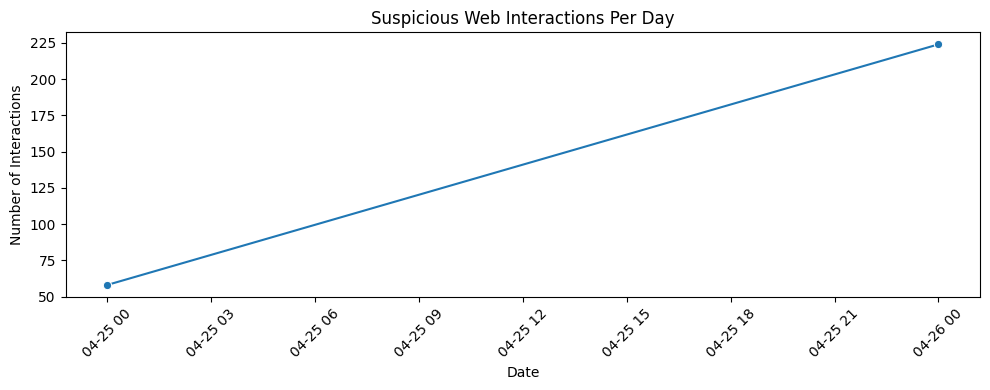

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by date
daily_threats = df.groupby('date').size()

# Plot
plt.figure(figsize=(10, 4))
sns.lineplot(x=daily_threats.index, y=daily_threats.values, marker='o')
plt.title("Suspicious Web Interactions Per Day")
plt.xlabel("Date")
plt.ylabel("Number of Interactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
# Threshold for anomaly detection
threshold = df['bytes_out'].quantile(0.95)

# Flag anomalies
df['is_anomaly'] = df['bytes_out'] > threshold

# Count
df['is_anomaly'].value_counts()


,count
is_anomaly,
False,267
True,15


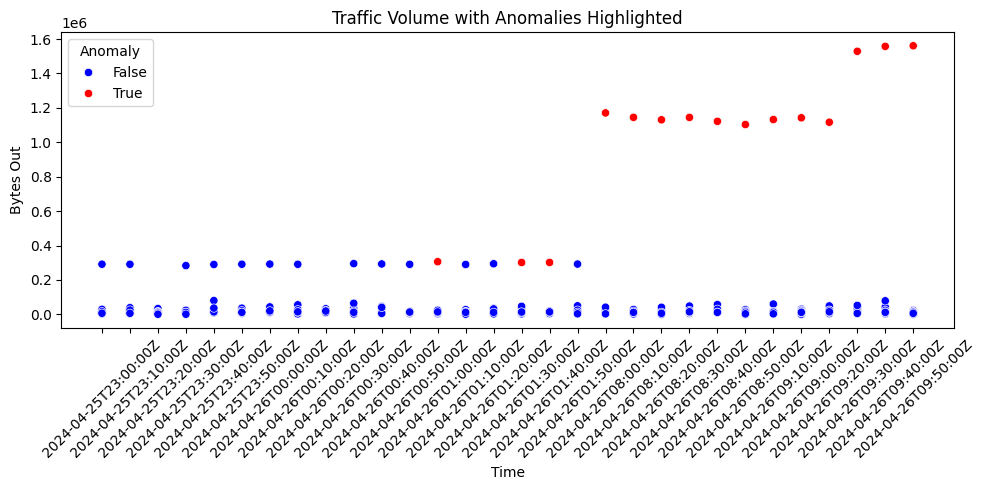

In [ ]:
# Plot anomalous traffic over time
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='time', y='bytes_out', hue='is_anomaly', palette={True: 'red', False: 'blue'})
plt.title("Traffic Volume with Anomalies Highlighted")
plt.xlabel("Time")
plt.ylabel("Bytes Out")
plt.legend(title='Anomaly')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
